In [1]:
import pandas as pd

#Le problème est un problème de classification supérvisé, car nous avons 10 classes de popularité qui sont bien présentent dans notre jeu de données 

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('/Users/selmafanani/Downloads/unpopular_songs.csv')

# Examiner les valeurs uniques dans la colonne 'popularity' (classes)
nombre_classes = df['popularity'].nunique()
print(f"Nombre de classes : {nombre_classes}")

# Examiner la distribution des classes dans la colonne 'popularity'
distribution_classes = df['popularity'].value_counts(normalize=True)
print(distribution_classes)

# Compter le nombre d'éléments dans chaque classe (valeurs de 'popularity')
nombre_elements_par_classe = df['popularity'].value_counts()

# Afficher le résultat
print("Nombre d'éléments dans chaque classe de 'popularity' :")
print(nombre_elements_par_classe)

# Optionnellement, afficher aussi la distribution en pourcentage
distribution_en_pourcentage = df['popularity'].value_counts(normalize=True) * 100
print("\nDistribution en pourcentage de chaque classe de 'popularity' :")
print(distribution_en_pourcentage)

Nombre de classes : 10
popularity
0    0.632458
1    0.205254
2    0.058925
8    0.030199
7    0.024306
3    0.022833
4    0.013749
5    0.007366
6    0.003928
9    0.000982
Name: proportion, dtype: float64
Nombre d'éléments dans chaque classe de 'popularity' :
popularity
0    2576
1     836
2     240
8     123
7      99
3      93
4      56
5      30
6      16
9       4
Name: count, dtype: int64

Distribution en pourcentage de chaque classe de 'popularity' :
popularity
0    63.245765
1    20.525411
2     5.892463
8     3.019887
7     2.430641
3     2.283329
4     1.374908
5     0.736558
6     0.392831
9     0.098208
Name: proportion, dtype: float64


In [2]:
 # Afficher les noms des colonnes
print("Colonnes du DataFrame :")
print(df.columns)

Colonnes du DataFrame :
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')


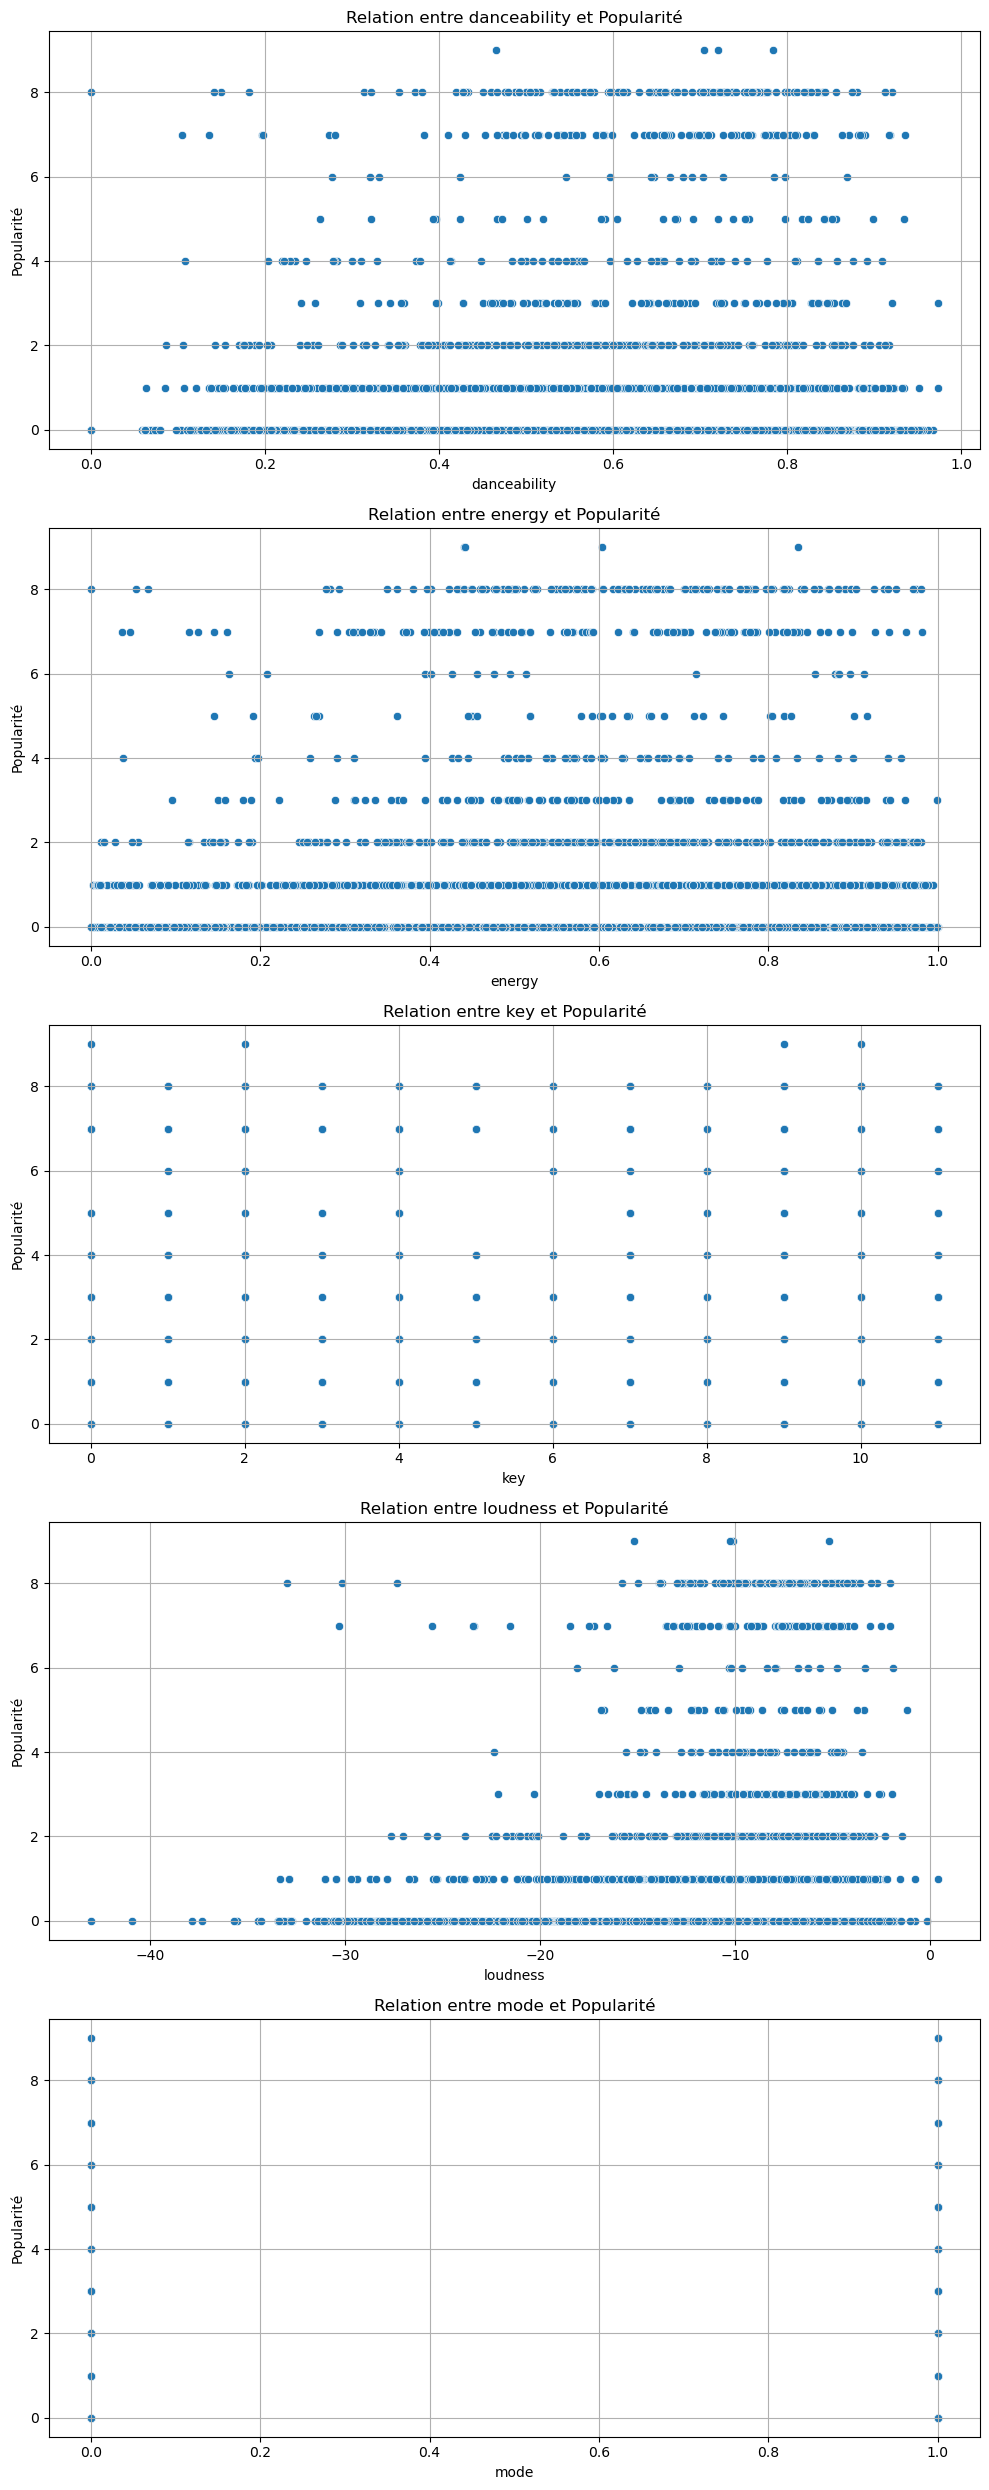

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df[['popularity'] + [col for col in numeric_df.columns if col != 'popularity']]

# Limiter le nombre de variables à visualiser (par exemple, les 5 premières)
num_vars = min(5, len(numeric_df.columns) - 1)  # On prend au maximum 5 variables
fig, axes = plt.subplots(num_vars, 1, figsize=(10, 5 * num_vars))

for i, col in enumerate(numeric_df.columns[1:num_vars + 1]):  # Limiter à num_vars
    # Scatter plot
    sns.scatterplot(x=numeric_df[col], y=numeric_df['popularity'], ax=axes[i])
    axes[i].set_title(f'Relation entre {col} et Popularité')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Popularité')
    axes[i].grid(True)

# Ajuster l'espace entre les sous-graphes
plt.tight_layout()
plt.show()


In [4]:
# Afficher les premières lignes du fichier
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [5]:
# Afficher les types des colonnes
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
explicit               bool
popularity            int64
track_name           object
track_artist         object
track_id             object
dtype: object

In [6]:
# Statistiques descriptives pour les colonnes numériques
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4.073000e+03,4073.000000
mean,0.584909,0.545931,5.171372,-10.877235,0.658237,0.142364,0.327200,0.199610,0.198481,0.468564,119.483633,2.098864e+05,0.927572
std,0.195275,0.253181,3.571346,6.082619,0.474359,0.169173,0.334721,0.348140,0.177769,0.273403,30.626790,1.140622e+05,1.880363
min,0.000000,0.000020,0.000000,-43.046000,0.000000,0.000000,0.000000,0.000000,0.016500,0.000000,0.000000,1.795100e+04,0.000000
25%,0.460000,0.372000,2.000000,-13.181000,0.000000,0.038600,0.030200,0.000000,0.096300,0.249000,96.512000,1.493330e+05,0.000000
50%,0.608000,0.565000,5.000000,-9.338000,1.000000,0.060300,0.194000,0.000037,0.124000,0.460000,119.948000,1.955790e+05,0.000000
75%,0.732000,0.736000,8.000000,-6.693000,1.000000,0.195000,0.589000,0.219000,0.241000,0.684000,139.993000,2.461730e+05,1.000000
max,0.973000,1.000000,11.000000,0.416000,1.000000,0.962000,0.996000,1.000000,0.990000,0.987000,215.983000,3.408890e+06,9.000000


In [7]:
# Vérifier les données manquantes dans chaque colonne
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [149]:
# Afficher des exemples de données pour repérer des régularités ou anomalies
print(df.sample(10))

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
1444         0.784   0.559    2    -4.862     1       0.0846      0.002100   
1594         0.709   0.879    8    -8.662     1       0.0400      0.056300   
267          0.618   0.203    0    -8.972     1       0.0348      0.951000   
2369         0.738   0.553    1   -10.495     1       0.2620      0.045600   
453          0.579   0.459    8   -10.423     1       0.0365      0.000566   
1093         0.533   0.719   10   -14.529     1       0.8660      0.652000   
1300         0.707   0.406   10   -11.141     0       0.0423      0.013500   
3262         0.665   0.481    3    -8.945     1       0.0273      0.446000   
1592         0.712   0.790    8    -5.952     1       0.0710      0.002060   
3954         0.830   0.611    7    -6.811     1       0.0333      0.476000   

      instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
1444          0.000000    0.4120    0.698   90.994       212453 

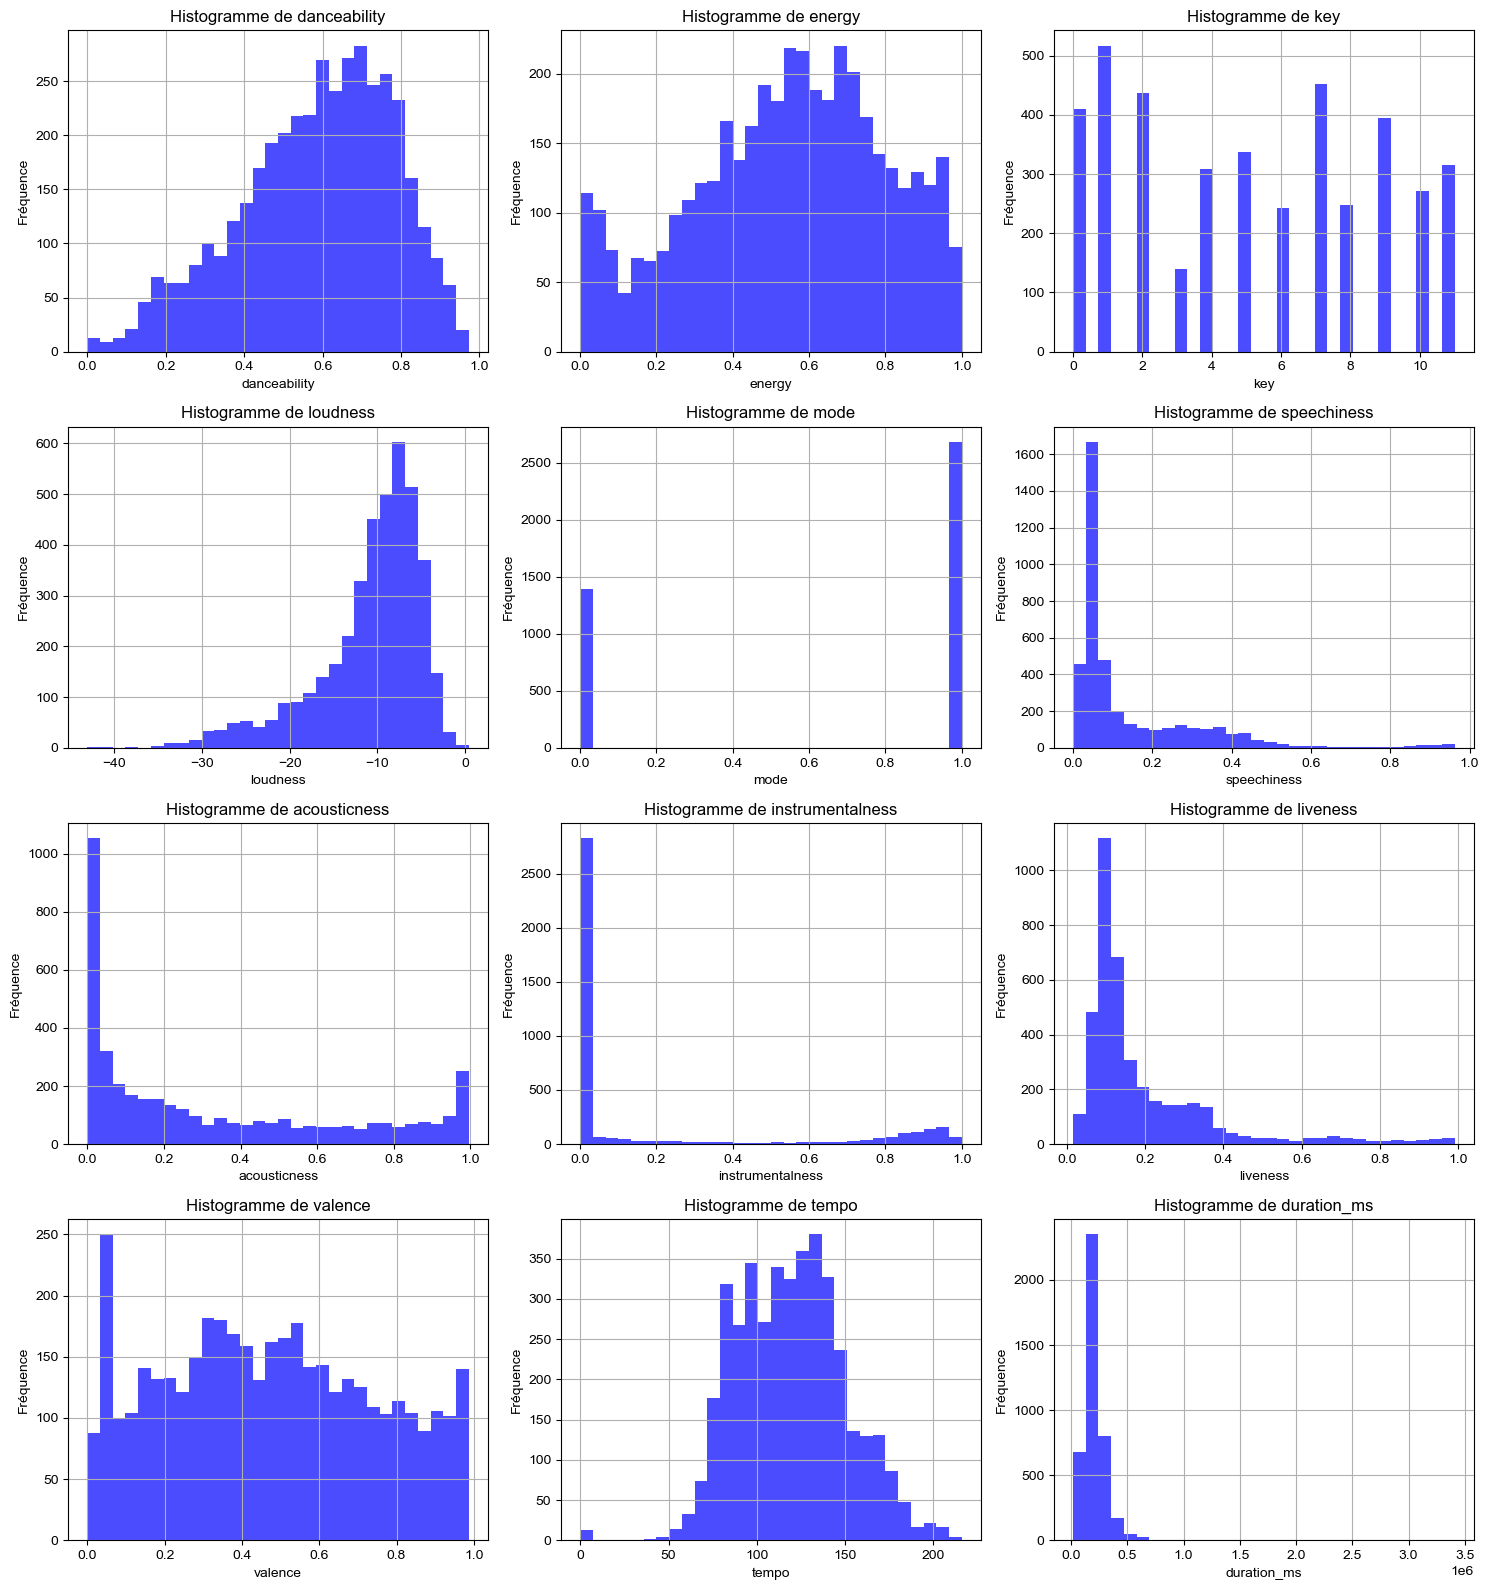

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Définir une nouvelle police
plt.rcParams['font.family'] = 'Arial'

# Tracer un histogramme pour chaque colonne numérique
# Sélectionner uniquement les colonnes numériques
num_cols = df.select_dtypes(include=['number']).columns[:12]  # Limiter à 12 colonnes

# Spécifier le nombre de colonnes et de lignes pour la mise en page
num_rows = (len(num_cols) // 3) + (len(num_cols) % 3 > 0)  # 3 colonnes par ligne

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Ajustez la taille de la figure

# Aplatir la matrice d'axes pour l'itération
axes = axes.flatten()

# Boucle à travers les colonnes numériques et tracer les histogrammes
for i, column in enumerate(num_cols):
    axes[i].hist(df[column], bins=30, color='blue', alpha=0.7)  # Ajuster le nombre de bins si nécessaire
    axes[i].set_title(f'Histogramme de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(True)

# Supprimer les sous-graphiques inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


In [9]:
# 1. Supprimer les colonnes avec peu de variabilité
# Par exemple, ici nous supprimons les colonnes avec une variance de 0
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=low_variance_cols, inplace=True)

# 2. Supprimer les colonnes avec trop de valeurs manquantes (par exemple plus de 30%)
threshold = 0.3 * len(df) 
missing_cols = df.columns[df.isnull().sum() > threshold]
df.drop(columns=missing_cols, inplace=True)

# 3. Supprimer les colonnes jugées non informatives
# Ajoutez les noms des colonnes non informatives
non_informative_cols = ['track_id', 'track_artist', 'track_name']  
df.drop(columns=non_informative_cols, inplace=True)

# 4. Pour les colonnes de type object avec peu de catégories
object_cols = df.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in object_cols if df[col].nunique() < 5] 
df.drop(columns=low_cardinality_cols, inplace=True)

# Afficher le DataFrame nettoyé
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.955   0.281    0   -11.392     0       0.4660        0.0048   
2         0.753   0.355    8   -11.799     1       0.5140        0.5730   
3         0.650   0.331    3   -10.818     0       0.3830        0.8650   
4         0.690   0.360    4   -15.624     0       0.4550        0.7640   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0            0.0000    0.0926   0.9270  151.968       220549     False   
1            0.0595    0.1220   0.0934  127.991       149543      True   
2            0.0000    0.0735   0.6000   91.978       130019      True   
3            0.0000    0.1050   0.5810   99.513       116193      True   
4            0.0000    0.1810   0.1050   89.893       111827      True   

   popularity  
0           8  
1           0  
2           0  
3           0  
4           0  


Corrélations avec la popularité:
popularity          1.000000
loudness            0.134261
energy              0.097132
explicit            0.065788
danceability        0.063003
valence             0.052275
speechiness         0.042300
tempo               0.033897
duration_ms         0.031168
liveness           -0.000472
mode               -0.017296
key                -0.020532
acousticness       -0.080361
instrumentalness   -0.100019
Name: popularity, dtype: float64


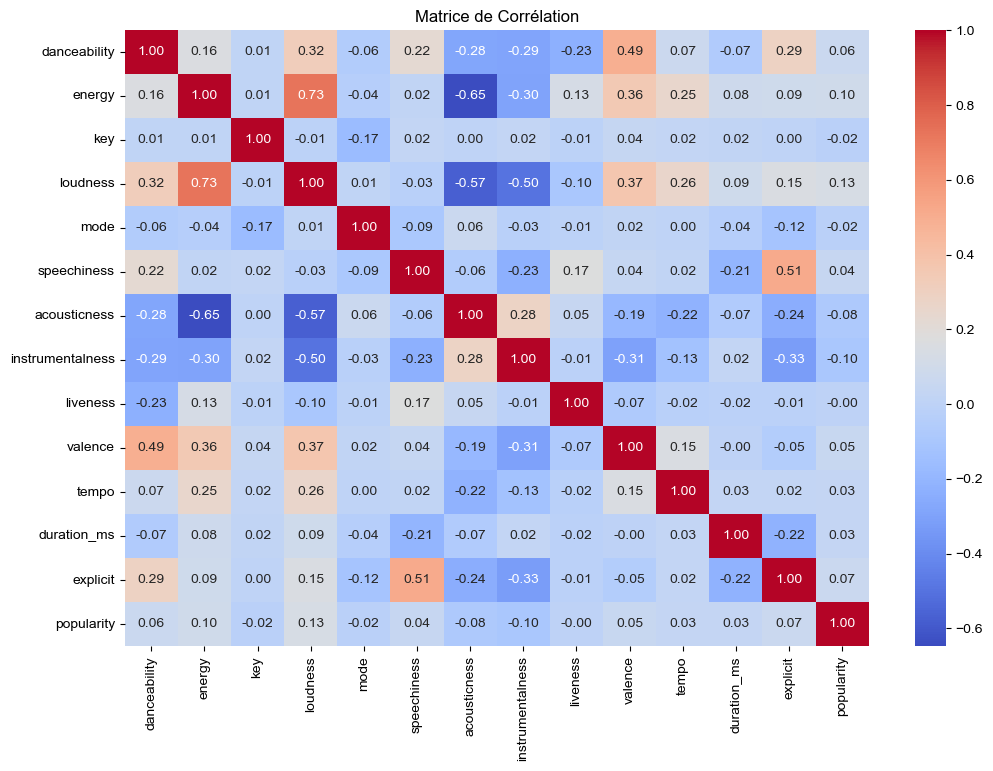

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)  # drop_first pour éviter la multicolinéarité


# 1. Convertir les colonnes booléennes en 0 et 1
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# 2. Encoder les colonnes de type object (s'il y en a encore après le nettoyage)
object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)  # drop_first pour éviter la multicolinéarité

# 3. Calculer la matrice de corrélation
correlation_matrix = df.corr()

# 4. Extraire la corrélation avec la colonne 'popularity'
popularity_correlation = correlation_matrix['popularity']

# 5. Afficher les corrélations avec la popularité
print("Corrélations avec la popularité:")
print(popularity_correlation.sort_values(ascending=False))  # Tri des corrélations


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [11]:
# Afficher toutes les colonnes de votre DataFrame
print("Variables présentes dans le DataFrame :")
print(df.columns.tolist())

Variables présentes dans le DataFrame :
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'popularity']


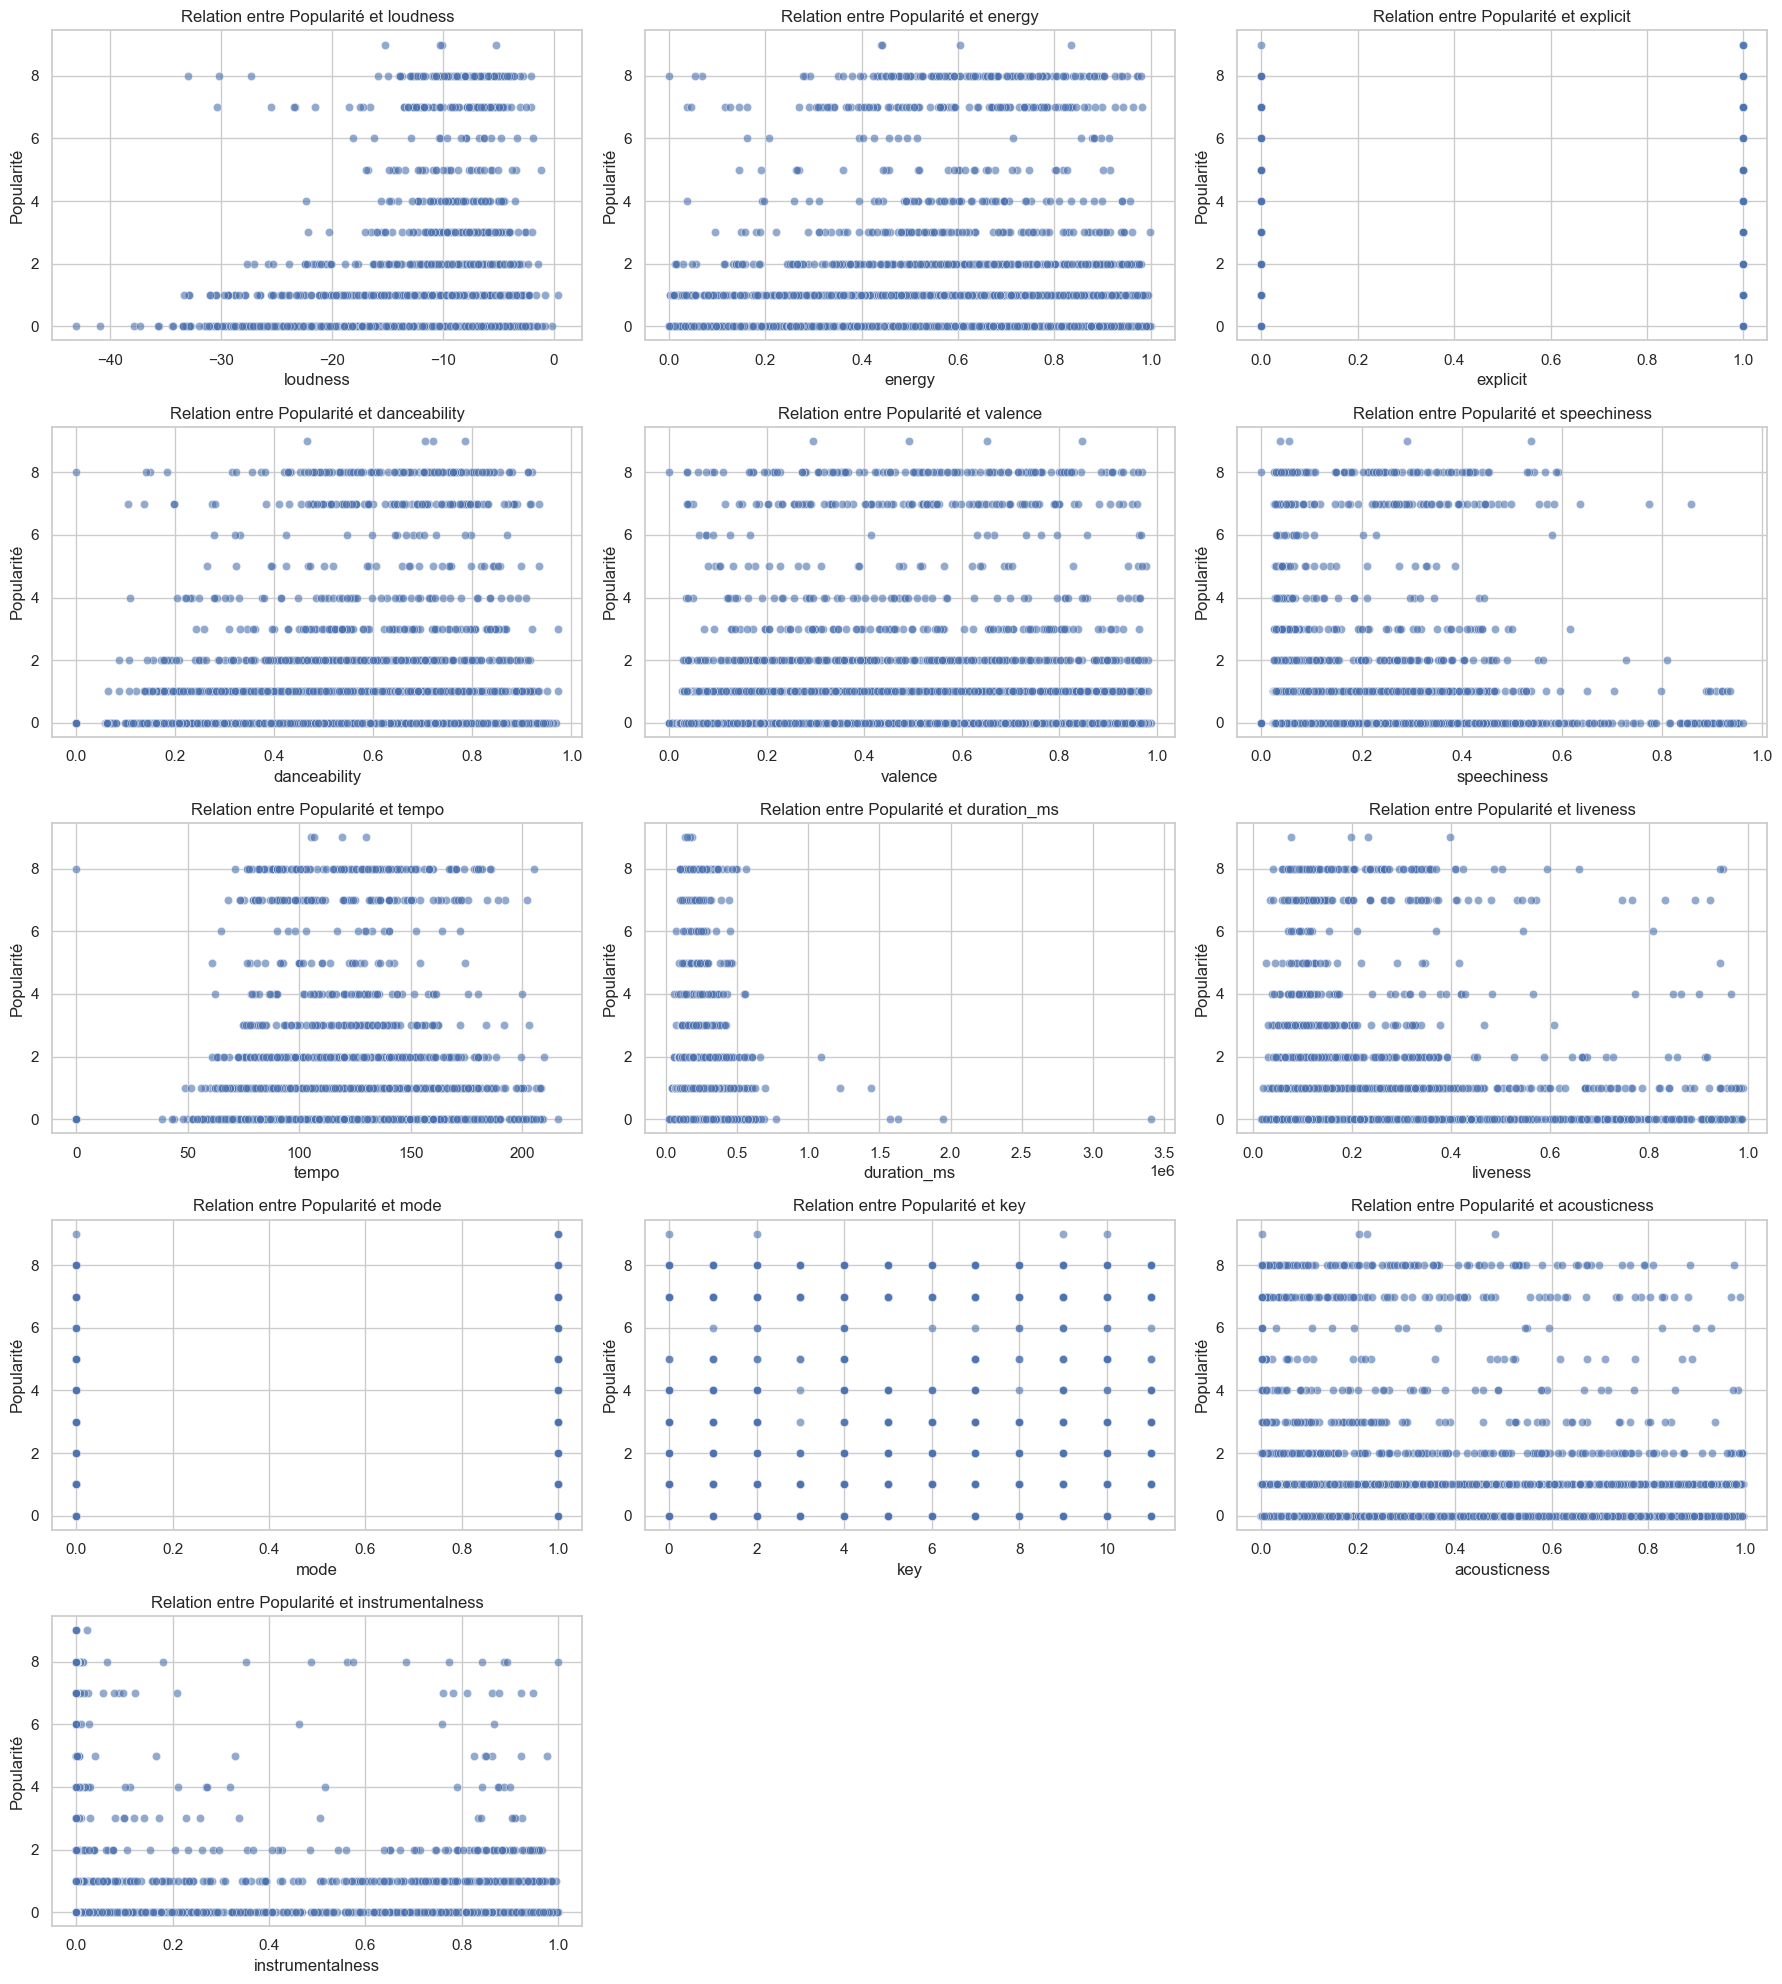

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Configuration des styles pour seaborn
sns.set(style="whitegrid")

# Liste des colonnes à tracer par rapport à 'popularity'
columns_to_plot = [
    'loudness',
    'energy',
    'explicit',        # Remarque : explicit sera converti en numérique (0 ou 1)
    'danceability',
    'valence',
    'speechiness',
    'tempo',
    'duration_ms',
    'liveness',
    'mode',
    'key',
    'acousticness',
    'instrumentalness'
]

# Vérifier si le nombre de colonnes est inférieur à 12
num_plots = len(columns_to_plot)  # Nombre de colonnes à tracer
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculer le nombre de lignes nécessaires

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 4))  # Ajustez la taille de la figure
axes = axes.flatten()  # Aplatir la matrice d'axes pour itération facile

# Boucle à travers les colonnes pour créer les scatter plots
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=column, y='popularity', ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Relation entre Popularité et {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Popularité')

# Supprimer les axes supplémentaires s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


In [13]:
# Nous choisissons de garder les variables ayant plus de 0.05 de corrélation en valeur absolue on obtient donc notre jeu de données finale 

# Obtenir les valeurs de corrélation pour la colonne 'popularity'
popularity_corr = correlation_matrix['popularity']

# Identifier les colonnes à garder (corrélation supérieure à 0.05 ou inférieure à -0.05)
columns_to_keep = popularity_corr[popularity_corr.abs() >= 0.05].index.tolist()

# Afficher les colonnes à garder
print("Colonnes à garder :", columns_to_keep)

# Garder uniquement les colonnes choisies dans le DataFrame
df_filtered = df[columns_to_keep]

# Afficher le DataFrame filtré
print(df_filtered.head())

Colonnes à garder : ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'explicit', 'popularity']
   danceability  energy  loudness  acousticness  instrumentalness  valence  \
0         0.722   0.476    -8.203        0.6700            0.0000   0.9270   
1         0.955   0.281   -11.392        0.0048            0.0595   0.0934   
2         0.753   0.355   -11.799        0.5730            0.0000   0.6000   
3         0.650   0.331   -10.818        0.8650            0.0000   0.5810   
4         0.690   0.360   -15.624        0.7640            0.0000   0.1050   

   explicit  popularity  
0         0           8  
1         1           0  
2         1           0  
3         1           0  
4         1           0  


In [14]:
# Compter les valeurs manquantes par colonne
missing_values = df_filtered.isnull().sum()

# Filtrer pour afficher uniquement les colonnes avec des valeurs manquantes
missing_values = missing_values[missing_values > 0]

# Afficher les colonnes avec leurs valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values)

Colonnes avec des valeurs manquantes :
Series([], dtype: int64)


In [15]:
# on a pas de valeurs manquantes 
# les valeurs de explicit on deja etaient remplacés par 0 et 1 pour etudier la correlation 

In [16]:
from sklearn.preprocessing import StandardScaler

popularity_col = df_filtered['popularity']

df_filtered = df_filtered.drop(columns=['popularity'])

cols_to_standardize = [col for col in df_filtered.select_dtypes(include=['float64', 'int64']).columns]

scaler = StandardScaler()

df_filtered.loc[:, cols_to_standardize] = scaler.fit_transform(df_filtered[cols_to_standardize])

df_filtered['popularity'] = df['popularity']

print(df_filtered.head())  # Affiche les premières lignes pour vérifier que "popularity" a bien été ajoutée


   danceability    energy  loudness  acousticness  instrumentalness   valence  \
0      0.702125 -0.276242  0.439706      1.024262         -0.573432  1.676983   
1      1.895459 -1.046536 -0.084639     -0.963311         -0.402503 -1.372367   
2      0.860894 -0.754219 -0.151559      0.734432         -0.573432  0.480801   
3      0.333369 -0.849024  0.009740      1.606909         -0.573432  0.411298   
4      0.538233 -0.734468 -0.780478      1.305127         -0.573432 -1.329933   

   explicit  popularity  
0 -0.608652           8  
1  1.642974           0  
2  1.642974           0  
3  1.642974           0  
4  1.642974           0  


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import time

# Séparer les données
X = df_filtered.drop(columns=['popularity'])  
y = df_filtered['popularity'] 

# Créer un classifieur d'arbre de décision
clf = DecisionTreeClassifier(max_depth=5)

# Utiliser StratifiedKFold pour la validation croisée
skf = StratifiedKFold(n_splits=3)

# Effectuer la validation croisée
start_time = time.time()  # Démarrer le chronomètre
scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')  # Validation croisée stratifiée
end_time = time.time()  # Arrêter le chronomètre

# Calculer l'erreur moyenne et le temps d'apprentissage
mean_accuracy = scores.mean()
error_rate = 1 - mean_accuracy
learning_time = end_time - start_time

# Afficher les résultats
print(f'Erreur moyenne : {error_rate:.4f}')
print(f'Temps d\'apprentissage : {learning_time:.4f} secondes')


Erreur moyenne : 0.3879
Temps d'apprentissage : 0.0415 secondes


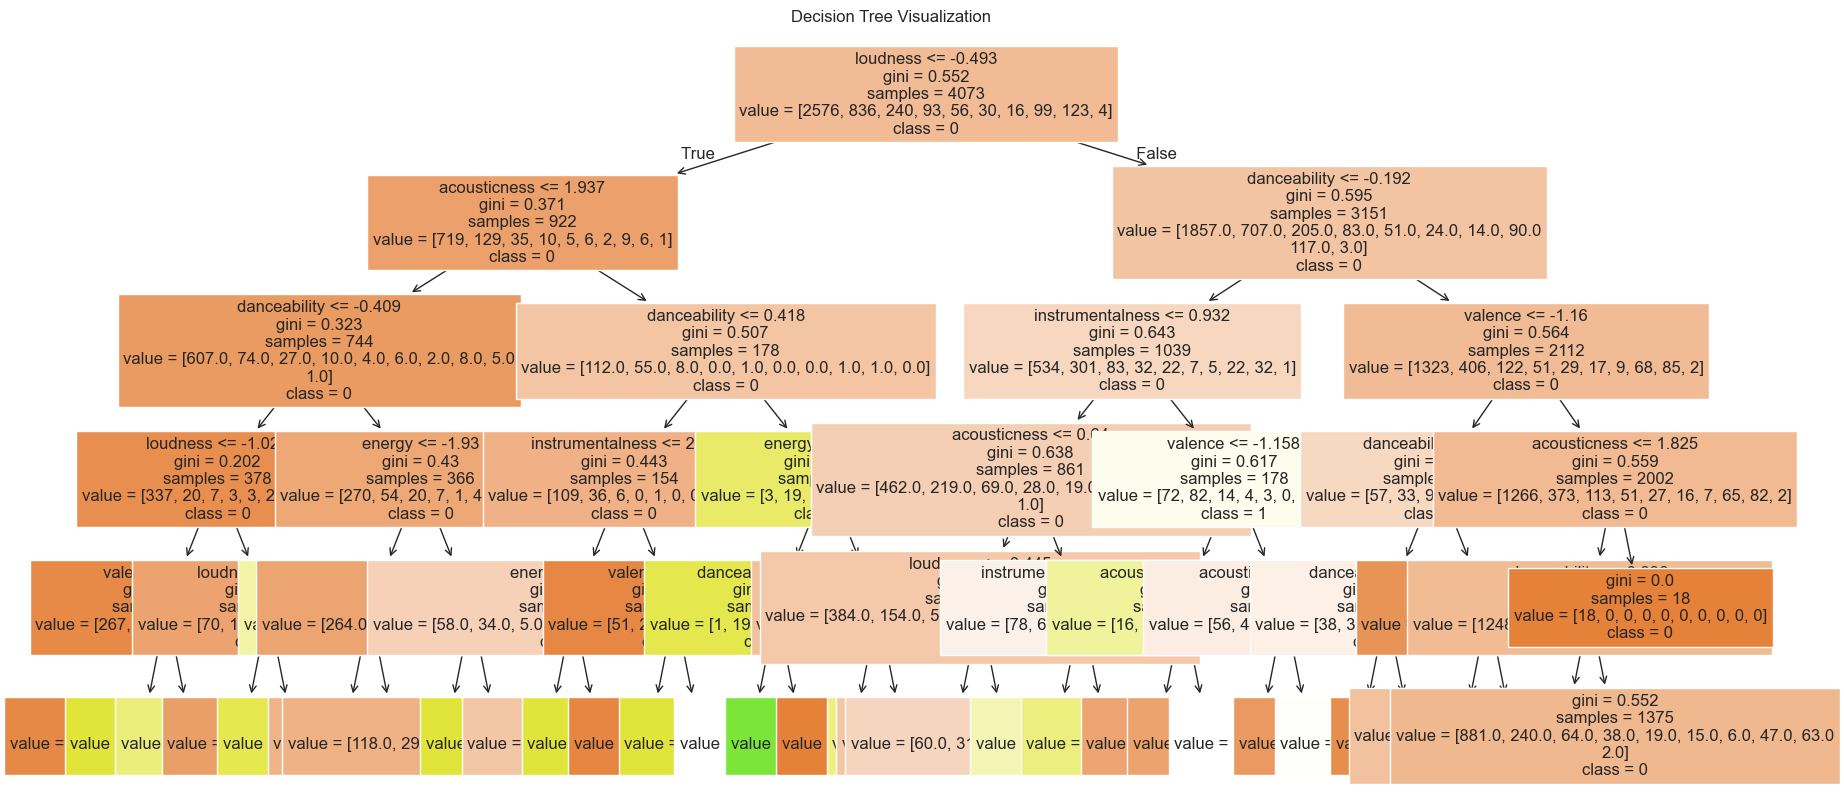

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the classifier
clf.fit(X, y)

plt.figure(figsize=(20, 10))  

# Plot the tree with increased fontsize
plot_tree(
    clf, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    fontsize=12,  
)

plt.title("Decision Tree Visualization")
plt.show()

In [66]:
# Séparer les données
X1 = df_filtered.drop(columns=['popularity'])  
y1 = df_filtered['popularity'] 


# Créer un classifieur d'arbre de décision
clf1 = DecisionTreeClassifier(max_depth=5)

# Utiliser StratifiedKFold pour la validation croisée
skf = StratifiedKFold(n_splits=3)

# Effectuer la validation croisée
start_time = time.time()  # Démarrer le chronomètre
scores = cross_val_score(clf1, X1, y1, cv=skf, scoring='accuracy')  # Validation croisée stratifiée
end_time = time.time()  # Arrêter le chronomètre

# Calculer l'erreur moyenne et le temps d'apprentissage
mean_accuracy = scores.mean()
error_rate = 1 - mean_accuracy
learning_time = end_time - start_time


clf1.fit(X1, y1)

# Afficher les résultats
print(f'Erreur moyenne : {error_rate:.4f}')
print(f'Temps d\'apprentissage : {learning_time:.4f} secondes')


Erreur moyenne : 0.3887
Temps d'apprentissage : 0.0494 secondes


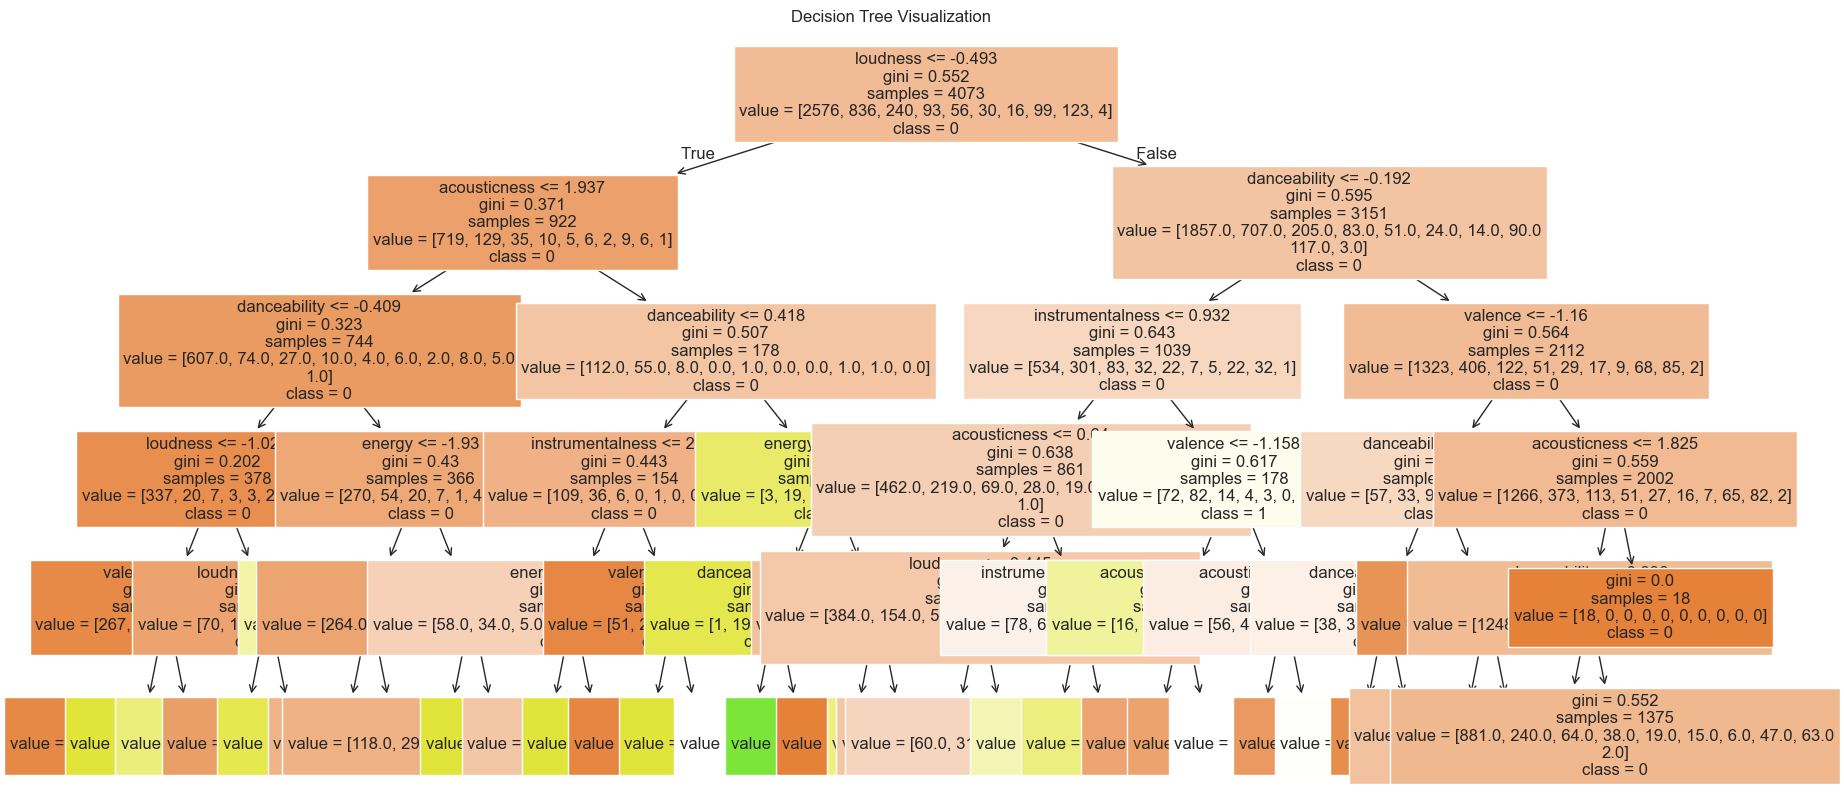

Les 6 colonnes les plus discriminantes sont :
danceability        0.282790
loudness            0.256919
acousticness        0.156109
instrumentalness    0.145394
energy              0.088099
valence             0.070689
dtype: float64
Les colonnes absentes sont :
['explicit']


In [67]:

plt.figure(figsize=(20, 10))  

# Plot the tree with increased fontsize
plot_tree(
    clf1, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    fontsize=12,  
)

plt.title("Decision Tree Visualization")
plt.show()

# Calculer l'importance des caractéristiques
feature_importances = pd.Series(clf1.feature_importances_, index=X1.columns)

# Trier les caractéristiques par importance
important_features = feature_importances.sort_values(ascending=False)

# Afficher les 6 colonnes les plus discriminantes
print("Les 6 colonnes les plus discriminantes sont :")
print(important_features.head(6))

# Colonnes absentes (importance 0)
absent_columns = important_features[important_features == 0].index.tolist()

print("Les colonnes absentes sont :")
print(absent_columns)


In [130]:
# Séparer les données
X2 = df_filtered.drop(columns=['popularity', 'explicit'])  
y2 = df_filtered['popularity'] 


# Créer un classifieur d'arbre de décision
clf2 = DecisionTreeClassifier(max_depth=5)

# Utiliser StratifiedKFold pour la validation croisée
skf = StratifiedKFold(n_splits=3)

# Effectuer la validation croisée
start_time = time.time()  # Démarrer le chronomètre
scores = cross_val_score(clf2, X2, y2, cv=skf, scoring='accuracy')  # Validation croisée stratifiée
end_time = time.time()  # Arrêter le chronomètre

# Calculer l'erreur moyenne et le temps d'apprentissage
mean_accuracy = scores.mean()
error_rate = 1 - mean_accuracy
learning_time = end_time - start_time


clf2.fit(X2, y2)

# Afficher les résultats
print(f'Accuracy : {mean_accuracy:.4f}')
print(f'Temps d\'apprentissage : {learning_time:.4f} secondes')

Accuracy : 0.6113
Temps d'apprentissage : 0.0419 secondes


In [165]:
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=4)

clf2 = DecisionTreeClassifier(max_depth=5)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.6086
Confusion Matrix:
[[459  41   6   0   0   0   0   0   0   0]
 [118  36   0   0   0   0   0   0   0   0]
 [ 39  11   1   0   0   0   0   0   0   0]
 [ 18   5   0   0   0   0   0   0   0   0]
 [ 12   4   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0]
 [ 25   3   0   0   0   0   0   0   0   0]
 [ 24   1   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]]


/Users/selmafanani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/selmafanani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/selmafanani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

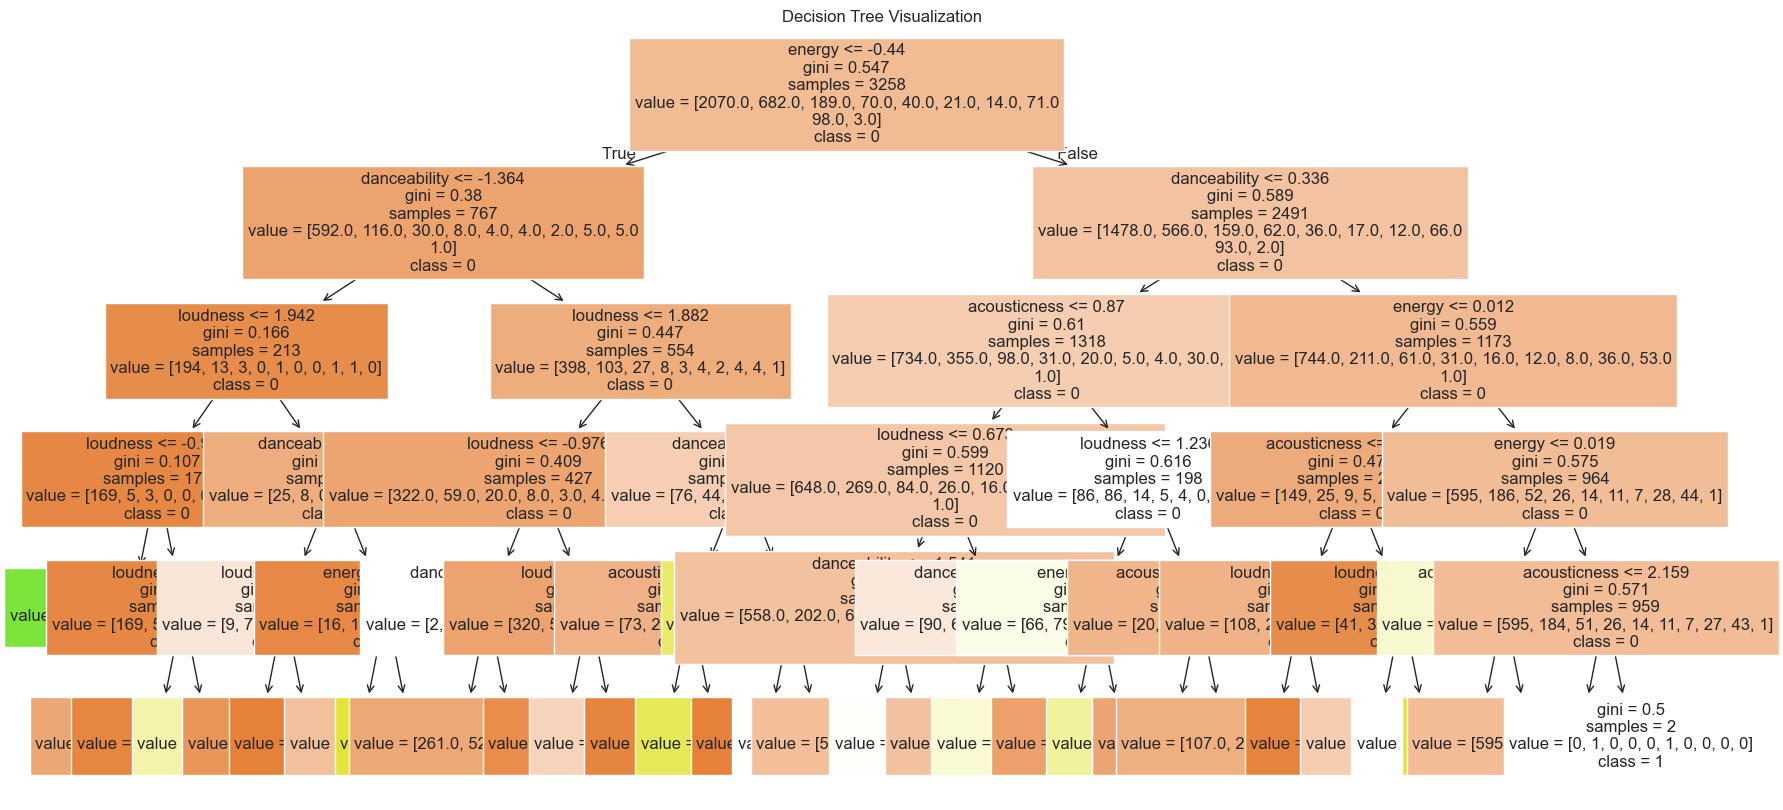

In [120]:
 plt.figure(figsize=(20, 10))  

plot_tree(
    clf2, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    fontsize=12,  
)

plt.title("Decision Tree Visualization")
plt.show()


In [160]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Définir le modèle de décision
model_2 = DecisionTreeClassifier(min_samples_split=3)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=4)

model_2.fit(X_train, y_train)

# Définir la grille d'hyperparamètres pour RandomizedSearchCV
param_dist = {
    'criterion': ['entropy', 'gini'], 
    'max_depth': randint(3, 20), 
    'max_leaf_nodes': randint(130, 200, 20) 
}
# Initialiser RandomizedSearchCV avec la validation croisée à 4 plis
random_search = RandomizedSearchCV(model_2, param_dist, n_iter=40, scoring='f1_macro', cv=4, random_state=42)

# Exécuter la Randomized Search
start_time = time.time()  # Démarrer le chronométrage
random_search.fit(X2, y2)
end_time = time.time()  # Fin du chronométrage

# Temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution de RandomizedSearchCV : {execution_time:.2f} secondes")

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres avec RandomizedSearchCV :", random_search.best_params_)
print("Meilleur F1-score moyen avec RandomizedSearchCV :", random_search.best_score_)

Temps d'exécution de RandomizedSearchCV : 1.49 secondes
Meilleurs paramètres avec RandomizedSearchCV : {'criterion': 'gini', 'max_depth': 16, 'max_leaf_nodes': 211}
Meilleur F1-score moyen avec RandomizedSearchCV : 0.10109475169235774


In [122]:
# Compter le nombre de valeurs uniques dans y
unique_values = y2.value_counts()

# Afficher le nombre de valeurs uniques et leur fréquence
print("Nombre de valeurs uniques dans y :")
print(unique_values)

# Afficher seulement le nombre de valeurs uniques
print(f"\nTotal des valeurs uniques dans y : {y2.nunique()}")


Nombre de valeurs uniques dans y :
popularity
0    2576
1     836
2     240
8     123
7      99
3      93
4      56
5      30
6      16
9       4
Name: count, dtype: int64

Total des valeurs uniques dans y : 10


In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Diviser les données d'origine en ensembles d'entraînement et de test
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y1)

# Définir les classes à augmenter et combien d'exemples créer
classes_to_augment = {8: 500, 6: 500, 7: 500, 9: 500, 5: 500, 3 : 500, 4: 500, 2: 500}

# Vérifier la distribution des classes dans y_train_real
class_distribution = pd.Series(y_train_real).value_counts()
print(f"Distribution des classes avant augmentation :\n{class_distribution}")

# Appliquer SMOTE avec la stratégie définie
smote = SMOTE(sampling_strategy=classes_to_augment, k_neighbors = 2 , random_state=42)

# Fit et resample uniquement pour les classes spécifiées
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_real, y_train_real)

# Vérifier la distribution après SMOTE
print(f"Distribution des classes après augmentation :\n{pd.Series(y_train_resampled).value_counts()}")

Distribution des classes avant augmentation :
popularity
0    2061
1     669
2     192
8      98
7      79
3      74
4      45
5      24
6      13
9       3
Name: count, dtype: int64
Distribution des classes après augmentation :
popularity
0    2061
1     669
7     500
2     500
3     500
8     500
4     500
6     500
5     500
9     500
Name: count, dtype: int64


In [125]:
clf5 = DecisionTreeClassifier(max_depth = 5)
clf5.fit(X_train_resampled, y_train_resampled)

# Étape 4: Tester le modèle sur les données réelles (sans données artificielles)
y_pred = clf5.predict(X_test_real)

# Étape 5: Évaluer la performance du modèle
accuracy = accuracy_score(y_test_real, y_pred)
print(f"Précision du modèle sur les données réelles : {accuracy:.4f}")

Précision du modèle sur les données réelles : 0.5988


In [126]:
from sklearn.model_selection import GridSearchCV

# Définir le modèle de décision
model_1 = DecisionTreeClassifier(min_samples_split=5, random_state = 42)

# Définir la grille d'hyperparamètres en prenant les valeurs qui avaient données les meilleurs résultats 
param_grid1 = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(1, 21),
    'max_leaf_nodes':  range(10, 221, 20)
}

# Initialiser GridSearchCV avec la validation croisée à 5 plis
select_hppmt_1 = GridSearchCV(model_1, param_grid1, scoring='f1_macro', cv=5)

# Exécuter la Grid Search sur le modèle
select_hppmt_1.fit(X_train_resampled, y_train_resampled)

# Récupérer les nouveaux résultats de la GridSearchCV
cv_results = pd.DataFrame(select_hppmt_1.cv_results_)

# Trier les résultats par F1-score moyen décroissant
sorted_cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)

# Afficher les 5 meilleures combinaisons d'hyperparamètres
top_5_results = sorted_cv_results[['param_criterion', 'param_max_depth', 'param_max_leaf_nodes', 
                                   'mean_test_score']].head(5)

print("Les 5 meilleures combinaisons d'hyperparamètres :")
print(top_5_results)

Les 5 meilleures combinaisons d'hyperparamètres :
    param_criterion  param_max_depth  param_max_leaf_nodes  mean_test_score
164         entropy               15                   210         0.550019
153         entropy               14                   210         0.549851
197         entropy               18                   210         0.549792
186         entropy               17                   210         0.549792
219         entropy               20                   210         0.549792


In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Préparation des données
X2 = df_filtered.drop(columns=['popularity', 'explicit', 'valence', 'energy'])  
y2 = df_filtered['popularity']

#  Normaliser les données
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

#  Définir la grille de recherche pour k (le nombre de voisins)
param_grid = {'n_neighbors': np.arange(1, 21)}  # Tester k de 1 à 20

# Configurer GridSearchCV pour effectuer la validation croisée
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')

# Entraîner le modèle et rechercher le meilleur k
grid_search.fit(X2_scaled, y2)

# Afficher le meilleur k et la meilleure performance
print(f"Meilleur k : {grid_search.best_params_['n_neighbors']}")
print(f"Meilleure précision (accuracy) obtenue : {grid_search.best_score_:.4f}")

Meilleur k : 20
Meilleure précision (accuracy) obtenue : 0.6219


In [150]:
descriptive_columns = X2.columns.tolist()
print("Colonnes descriptives restantes :", descriptive_columns)

DF = X2.copy()

print(DF.head())

Colonnes descriptives restantes : ['danceability', 'loudness', 'acousticness', 'instrumentalness']
   danceability  loudness  acousticness  instrumentalness
0      0.702125  0.439706      1.024262         -0.573432
1      1.895459 -0.084639     -0.963311         -0.402503
2      0.860894 -0.151559      0.734432         -0.573432
3      0.333369  0.009740      1.606909         -0.573432
4      0.538233 -0.780478      1.305127         -0.573432


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
import numpy as np
import os

k = 10

davies_bouldin_scores = []
silhouette_scores = []
rand_indices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(DF, y2, test_size=0.3, random_state=i)

    kmeans = KMeans(n_clusters=k, random_state=i)
    kmeans.fit(X_train)
    
    test_clusters = kmeans.predict(X_test)
    
    # Convertir y_test en valeurs discrètes (binaire) pour le Rand Index
    y_test = (y_test > 0).astype(int)  # Transformer y_test en valeurs binaires (0 ou 1)
    
  
    davies_bouldin = davies_bouldin_score(X_test, test_clusters)
    silhouette_avg = silhouette_score(X_test, test_clusters)
    rand_index = adjusted_rand_score(y_test, test_clusters)
    
  
    davies_bouldin_scores.append(davies_bouldin)
    silhouette_scores.append(silhouette_avg)
    rand_indices.append(rand_index)


mean_davies_bouldin = np.mean(davies_bouldin_scores)
mean_silhouette = np.mean(silhouette_scores)
mean_rand_index = np.mean(rand_indices)

# Afficher les résultats
print(f"Moyenne du score de Davies-Bouldin : {mean_davies_bouldin}")
print(f"Moyenne de la silhouette moyenne : {mean_silhouette}")
print(f"Moyenne du Rand Index : {mean_rand_index}")

Moyenne du score de Davies-Bouldin : 1.1391779662712687
Moyenne de la silhouette moyenne : 0.2623468732242902
Moyenne du Rand Index : 0.0008103338441718287


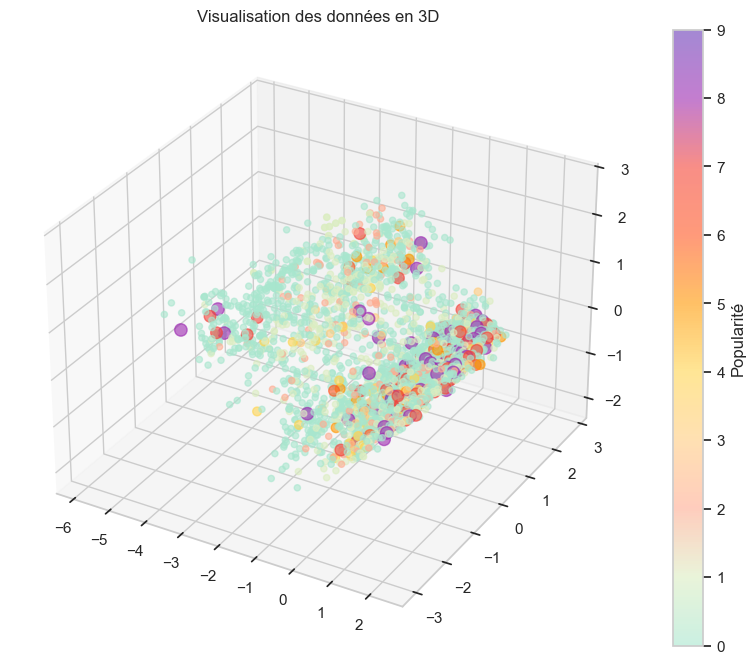

In [159]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=3)
DF_pca = pca.fit_transform(DF)

colors = [
    '#A8E6CE',  # Classe 0 : Vert clair
    '#DCEDC1',  # Classe 1 : Vert très clair
    '#FFAB91',  # Classe 2 : Orange clair
    '#FFCC80',  # Classe 3 : Jaune clair
    '#FFD54F',  # Classe 4 : Jaune
    '#FF9800',  # Classe 5 : Orange
    '#FF5722',  # Classe 6 : Rouge
    '#F44336',  # Classe 7 : Rouge foncé
    '#9C27B0',  # Classe 8 : Violet
    '#673AB7'   # Classe 9 : Violet foncé
]


custom_cmap = LinearSegmentedColormap.from_list('my_custom_cmap', colors)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sizes = np.clip(y2 * 10, 20, 100) 

sc = ax.scatter(DF_pca[:, 0], DF_pca[:, 1], DF_pca[:, 2], 
                 c=y2, cmap=custom_cmap, alpha=0.6, s=sizes)

ax.set_title("Visualisation des données en 3D")
plt.colorbar(sc, label='Popularité') 
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
plt.show()
plt.close('all')  # Close any figures after showing